### I created this notebook to study and understand the optical spring effect in Fabry-Perot cavities. </br>
#### The objective is to figure out a way to determine the spring constant for a given cavity.

In [2]:
import finesse
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

In [7]:
# USING THE MODEL DISCUSSED IN FINESSE EXAMPLE PAGES...
kat = finesse.Model()
finesse.configure(plotting=True)
kat.parse(
    """
    l l1 P=3
    s s1 l1.p1 Min.p1 L=1

    # The cavity
    m Min R=0.9937 L=0
    s scav Min.p2 Mend.p1 L=1
    m Mend R=1 L=0 phi=-0.048  # Roughly 40kHz detuning

    # Suspend mirrors on pendula
    pendulum sus1 Min.mech mass=0.25 fz=1 Qz=1000
    pendulum sus2 Mend.mech mass=0.25 fz=1 Qz=1000

    # Apply a `force signal' to the end mirror
    fsig(1)
    sgen force Mend.mech.F_z

    # we want to measure the longitudinal motion signal of both mirrors
    xd Mend_z Mend.mech.z
    #xd Min_z Min.mech.z

    xaxis(fsig.f, lin, 0.1, 1k, 30000)
    """
)

Text(0, 0.5, 'Phase')

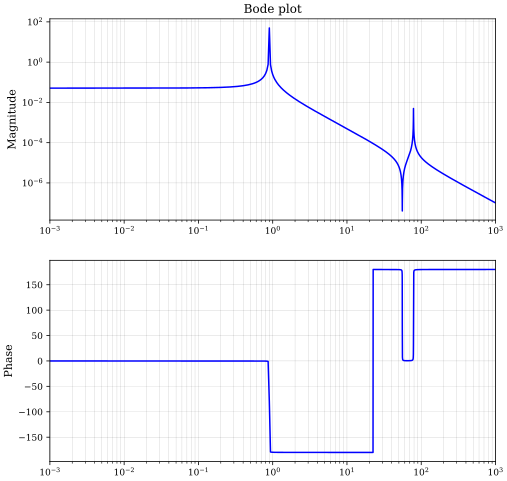

In [8]:
#PLOTTING THE TRANSFER FUNCTION 
out=kat.run()
mag=[]
phs=[]
f=np.linspace(0.001,1000,30000)
for i in range(30000):
    mag.append(abs(out["Mend_z"][i]))
    phs.append(180*np.angle(out["Mend_z"][i])/np.pi)

fig,a=plt.subplots(2,figsize=(8,8))
a[0].loglog(f,mag)
a[0].set_title("Bode plot")
a[0].set_ylabel("Magnitude")
a[1].semilogx(f,phs)
a[1].set_ylabel("Phase")

In [9]:
# LOCATING THE PEAKS AND FINDING THE RESONANT FREQUENCIES
peaks,_=sig.find_peaks(mag)
print("The resonance frequency corresponding to optical effects: ",f[peaks[1]],"Hz") #THE FIRST RES.FREQUENCY CORRESPONDS 
                                                                                    #TO THE NATURAL FREQUENCY.

The resonance frequency corresponding to optical effects:  78.63687589586321 Hz


### We know, the relation between the resonant and the natural frequencies of a forced damped oscillator. <br>
$\omega_{res}=\sqrt{\omega^{2}_{0}+\frac{k_{opt}}{m}}$

In [10]:
res_w=2*np.pi*f[peaks[1]]
k_opt=0.25*(res_w**2-2*np.pi*1)
print("The optical spring constant is ", k_opt,"N/m")

The optical spring constant is  61029.676849673524 N/m
